<a href="https://colab.research.google.com/github/rajshekharsingh66/Capstone_project1/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on dataset Global Terrorism

Github link - https://github.com/rajshekharsingh66/Capstone_project1

## Objective

Terrorism is a threat of violence that creates fear in a population. It is also important to understand that all violent acts are not terrorist acts.

As a security/defense analyst,find out the hot zone of terrorism and derive some security issues and insights by EDA.

## TABLE OF CONTENTS:
### 1. What this data set is all about?
### 2. Installation of libraries and dataset
### 3. Basic Analysis
### 4. Motive behind activities related to terrorism
### 5. Number of terrorist activities occured in region with respect to year
### 6. Number of terrorist activities vs Year
### 7. Who are the main targets?
### 8. Hot zones of terrorism by country and city
### 9. What are the attacking methods used?
### 10. Attacks vs Killed
### 11. Most Notorious Groups
### 12. Conclusion

## 1. What this data set is all about?
1. Consists Information on more than 180,000 Terrorist Attacks.

2. Includes information on terrorist attacks around the world from 1970 to 2017.

3. Includes systematic data on domestic as well as international terrorist incidents that have occurred during specific time period.

## 2. Installation of libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
csv_file_path = '/content/Global Terrorism Data.csv'

encodings_to_try = ['utf-8', 'ISO-8859-1', 'latin1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv(csv_file_path, encoding=encoding)
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        continue  # If decoding fails, try the next encoding


In [ ]:
df.head()

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT_MISC INT_ANY  related  
0      0.0       0.0      0.0     0.0      NaN  
1      0.0       1.0      1.0     1.0      NaN  
2     -9.0      -9.0      1.0     1.0      NaN  
3     -9.0      -9.0      1.0     1.0      NaN  
4     -9.0      -9.0      1.0     1.0      NaN  

[5 rows x 135 columns]

In [ ]:
df.tail()

eventid  iyear  imonth  iday approxdate  extended resolution  \
74726  200211020001   2002      11     2        NaN         0        NaN   
74727  200211020002   2002      11     2        NaN         0        NaN   
74728  200211020003   2002      11     2        NaN         0        NaN   
74729  200211020004   2002      11     2        NaN         0        NaN   
74730  200211030001   2002      11     3        NaN         0        NaN   

       country country_txt  region  ...  \
74726       92       India       6  ...   
74727       92       India       6  ...   
74728       92       India       6  ...   
74729      147     Nigeria      11  ...   
74730       34     Burundi      11  ...   

                                                addnotes  \
74726  The perpetrators warned of Mr. Sayeed's statem...   
74727                                                NaN   
74728                                                NaN   
74729                                                NaN   
74730                                                NaN   

                                                  scite1  \
74726  Delhi TV reports swearing-in by new Kashmir m...   
74727  Congress Party Leader Killed in Terrorist Att...   
74728  Congress Party Leader Killed in Terrorist Att...   
74729  Isa Abdulsalami, "Nigeria: Political Assistant...   
74730                                                NaN   

                                                  scite2  \
74726  Policeman Injured in Attack on Indian-Kashmir...   
74727  Rana Jawad, Politician among 24 Killed in Day...   
74728  Rana Jawad, Politician among 24 Killed in Day...   
74729  Taye Obateru, "Two LG Bosses Beheaded as Plate...   
74730                                                NaN   

                                                  scite3  dbsource  INT_LOG  \
74726  Izhar Wani, Kashmiri leader escapes grenade a...     CETIS      1.0   
74727                                                NaN     CETIS      0.0   
74728                                                NaN     CETIS      0.0   
74729  Funmi Peter-Omale, "Dariye Vows to Bring Aide'...     CETIS     -9.0   
74730                                                NaN       NaN      NaN   

       INT_IDEO INT_MISC INT_ANY                     related  
74726       1.0      0.0     1.0                         NaN  
74727       1.0      0.0     1.0  200211020002, 200211020003  
74728       1.0      0.0     1.0  200211020003, 200211020002  
74729      -9.0      0.0    -9.0                         NaN  
74730       NaN      NaN     NaN                         NaN  

[5 rows x 135 columns]

In [ ]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [ ]:
df.describe()

eventid          iyear         imonth           iday  \
count  1.816910e+05  181691.000000  181691.000000  181691.000000   
mean   2.002705e+11    2002.638997       6.467277      15.505644   
std    1.325957e+09      13.259430       3.388303       8.814045   
min    1.970000e+11    1970.000000       0.000000       0.000000   
25%    1.991021e+11    1991.000000       4.000000       8.000000   
50%    2.009022e+11    2009.000000       6.000000      15.000000   
75%    2.014081e+11    2014.000000       9.000000      23.000000   
max    2.017123e+11    2017.000000      12.000000      31.000000   

            extended        country         region       latitude  \
count  181691.000000  181691.000000  181691.000000  177135.000000   
mean        0.045346     131.968501       7.160938      23.498343   
std         0.208063     112.414535       2.933408      18.569242   
min         0.000000       4.000000       1.000000     -53.154613   
25%         0.000000      78.000000       5.000000      11.510046   
50%         0.000000      98.000000       6.000000      31.467463   
75%         0.000000     160.000000      10.000000      34.685087   
max         1.000000    1004.000000      12.000000      74.633553   

          longitude    specificity  ...     ransomamt   ransomamtus  \
count  1.771340e+05  181685.000000  ...  1.350000e+03  5.630000e+02   
mean  -4.586957e+02       1.451452  ...  3.172530e+06  5.784865e+05   
std    2.047790e+05       0.995430  ...  3.021157e+07  7.077924e+06   
min   -8.618590e+07       1.000000  ... -9.900000e+01 -9.900000e+01   
25%    4.545640e+00       1.000000  ...  0.000000e+00  0.000000e+00   
50%    4.324651e+01       1.000000  ...  1.500000e+04  0.000000e+00   
75%    6.871033e+01       1.000000  ...  4.000000e+05  0.000000e+00   
max    1.793667e+02       5.000000  ...  1.000000e+09  1.320000e+08   

         ransompaid  ransompaidus  hostkidoutcome     nreleased  \
count  7.740000e+02    552.000000    10991.000000  10400.000000   
mean   7.179437e+05    240.378623        4.629242    -29.018269   
std    1.014392e+07   2940.967293        2.035360     65.720119   
min   -9.900000e+01    -99.000000        1.000000    -99.000000   
25%   -9.900000e+01      0.000000        2.000000    -99.000000   
50%    0.000000e+00      0.000000        4.000000      0.000000   
75%    1.273412e+03      0.000000        7.000000      1.000000   
max    2.750000e+08  48000.000000        7.000000   2769.000000   

             INT_LOG       INT_IDEO       INT_MISC        INT_ANY  
count  181691.000000  181691.000000  181691.000000  181691.000000  
mean       -4.543731      -4.464398       0.090010      -3.945952  
std         4.543547       4.637152       0.568457       4.691325  
min        -9.000000      -9.000000      -9.000000      -9.000000  
25%        -9.000000      -9.000000       0.000000      -9.000000  
50%        -9.000000      -9.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 77 columns]

In [ ]:
df.dtypes

eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

In [ ]:
print("Number of rows:",df.shape[0])
print("Number of columns:",df.shape[1])

Number of rows: 181691
Number of columns: 135


In [ ]:
df.index

RangeIndex(start=0, stop=181691, step=1)

In [ ]:
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [ ]:
df.nunique()

eventid       181691
iyear             47
imonth            13
iday              32
approxdate      2244
               ...  
INT_LOG            3
INT_IDEO           3
INT_MISC           3
INT_ANY            3
related        14306
Length: 135, dtype: int64

## 3. Data preperation and Cleaning

In [ ]:
# renaming the columns
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
df=df[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType',
               'Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

# concatinating the columns killed and wounded
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.head(5)

Year  Month  Day             Country                       Region  \
0  1970      7    2  Dominican Republic  Central America & Caribbean   
1  1970      0    0              Mexico                North America   
2  1970      1    0         Philippines               Southeast Asia   
3  1970      1    0              Greece               Western Europe   
4  1970      1    0               Japan                    East Asia   

            city   latitude   longitude                      AttackType  \
0  Santo Domingo  18.456792  -69.951164                   Assassination   
1    Mexico city  19.371887  -99.086624     Hostage Taking (Kidnapping)   
2        Unknown  15.478598  120.599741                   Assassination   
3         Athens  37.997490   23.762728               Bombing/Explosion   
4        Fukouka  33.580412  130.396361  Facility/Infrastructure Attack   

   Killed  Wounded                   Target Summary  \
0     1.0      0.0             Julio Guzman     NaN   
1     0.0      0.0  Nadine Chaval, daughter     NaN   
2     1.0      0.0                 Employee     NaN   
3     0.0      0.0             U.S. Embassy     NaN   
4     0.0      0.0           U.S. Consulate     NaN   

                                Group                  Target_type  \
0                              MANO-D  Private Citizens & Property   
1  23rd of September Communist League      Government (Diplomatic)   
2                             Unknown          Journalists & Media   
3                             Unknown      Government (Diplomatic)   
4                             Unknown      Government (Diplomatic)   

  Weapon_type Motive  Casualty  
0     Unknown    NaN       1.0  
1     Unknown    NaN       0.0  
2     Unknown    NaN       1.0  
3  Explosives    NaN       0.0  
4  Incendiary    NaN       0.0

# 3. Basic Analysis by using visulisation




#1.Which region has highest terrorirst attacks?




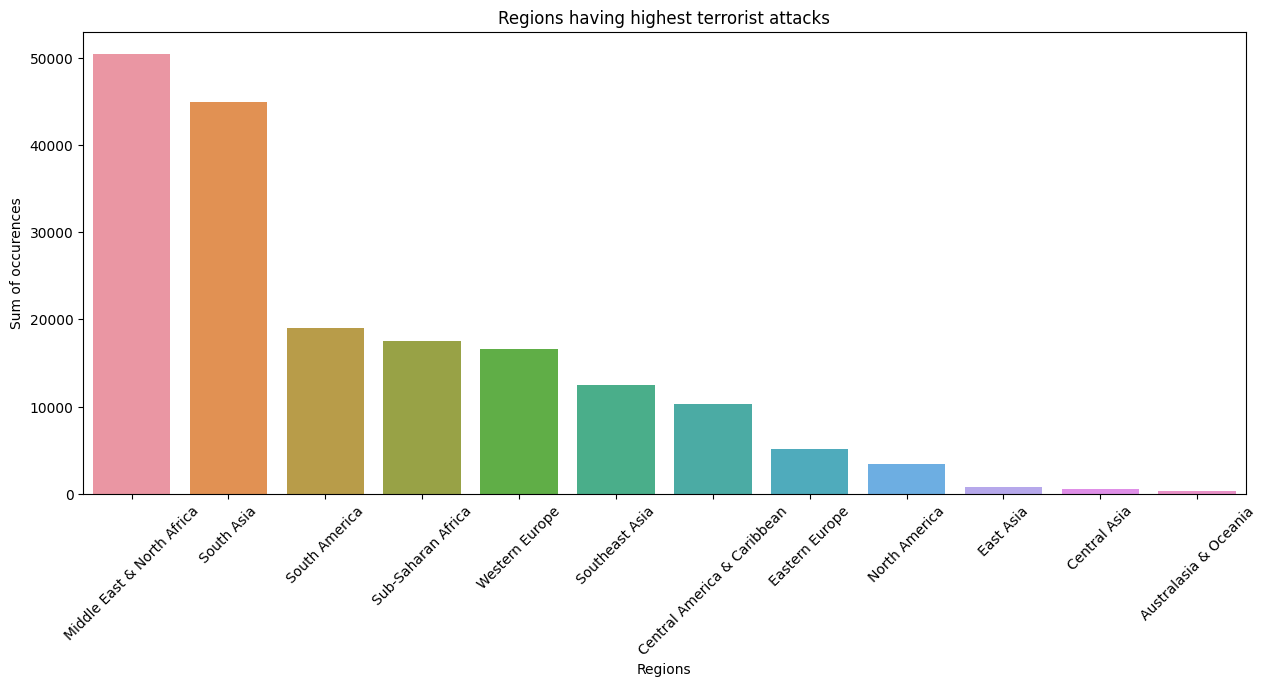

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size (width, height) in inches
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

# Assuming 'df' is your DataFrame with a 'Region' column
sns.countplot(x='Region', data=df,order=df['Region'].value_counts().index)

# Add labels and a title
plt.xlabel('Regions')
plt.ylabel('Sum of occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()

#2.Which country has highest terrorirst attacks?

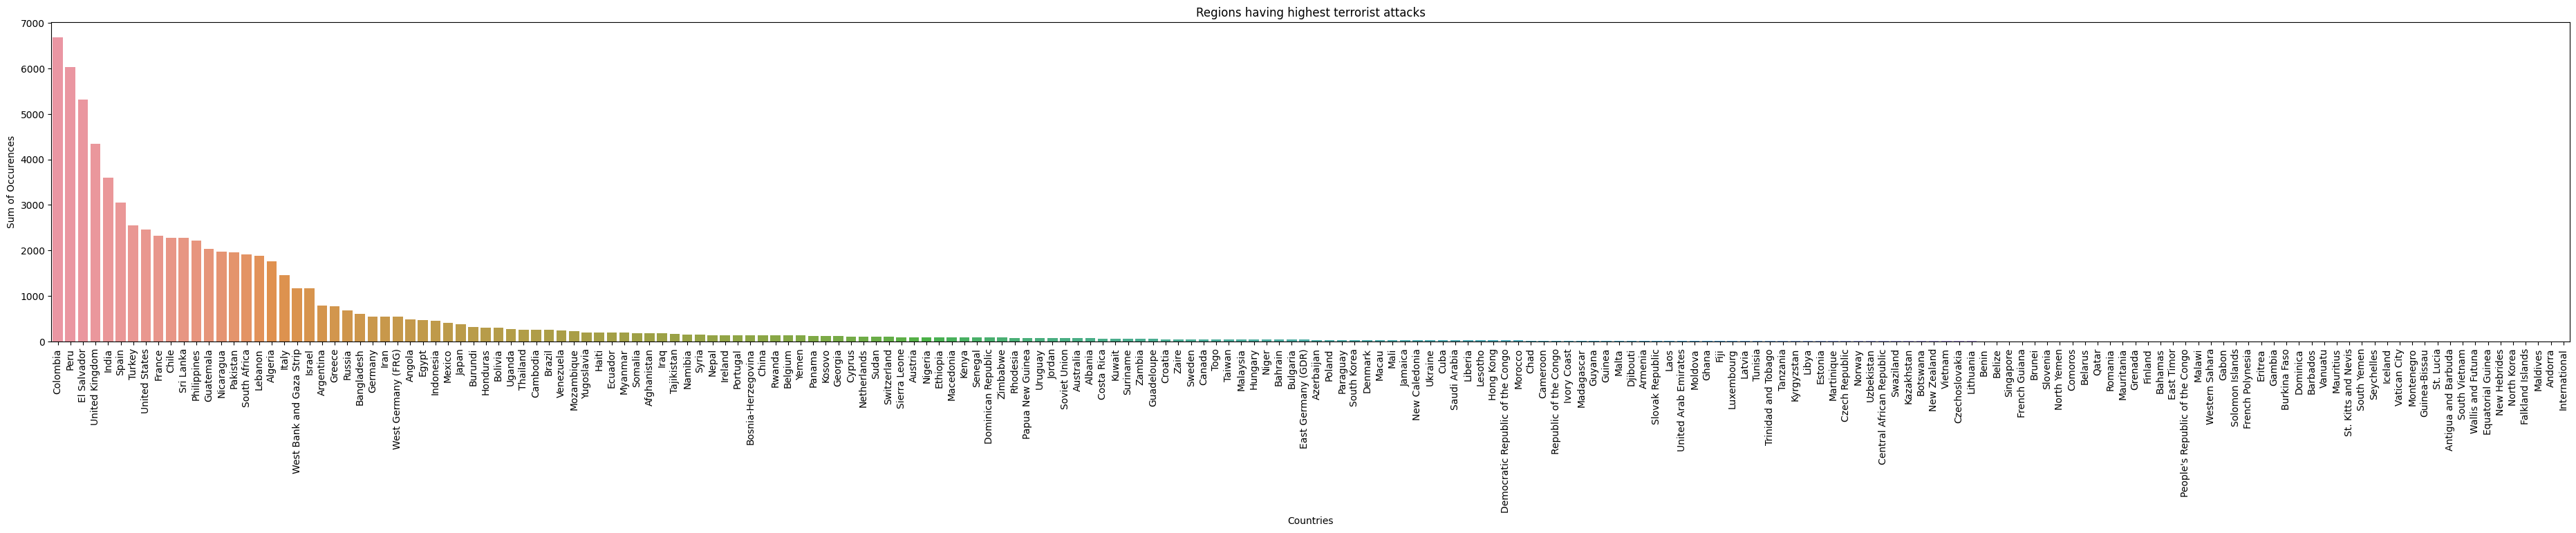

In [ ]:
plt.figure(figsize=(47,6))
sns.countplot(x='Country', data=df , order=df['Country'].value_counts().index)

# Add labels and a title
plt.xlabel('Countries')
plt.ylabel('Sum of Occurences')
plt.title('Regions having highest terrorist attacks')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

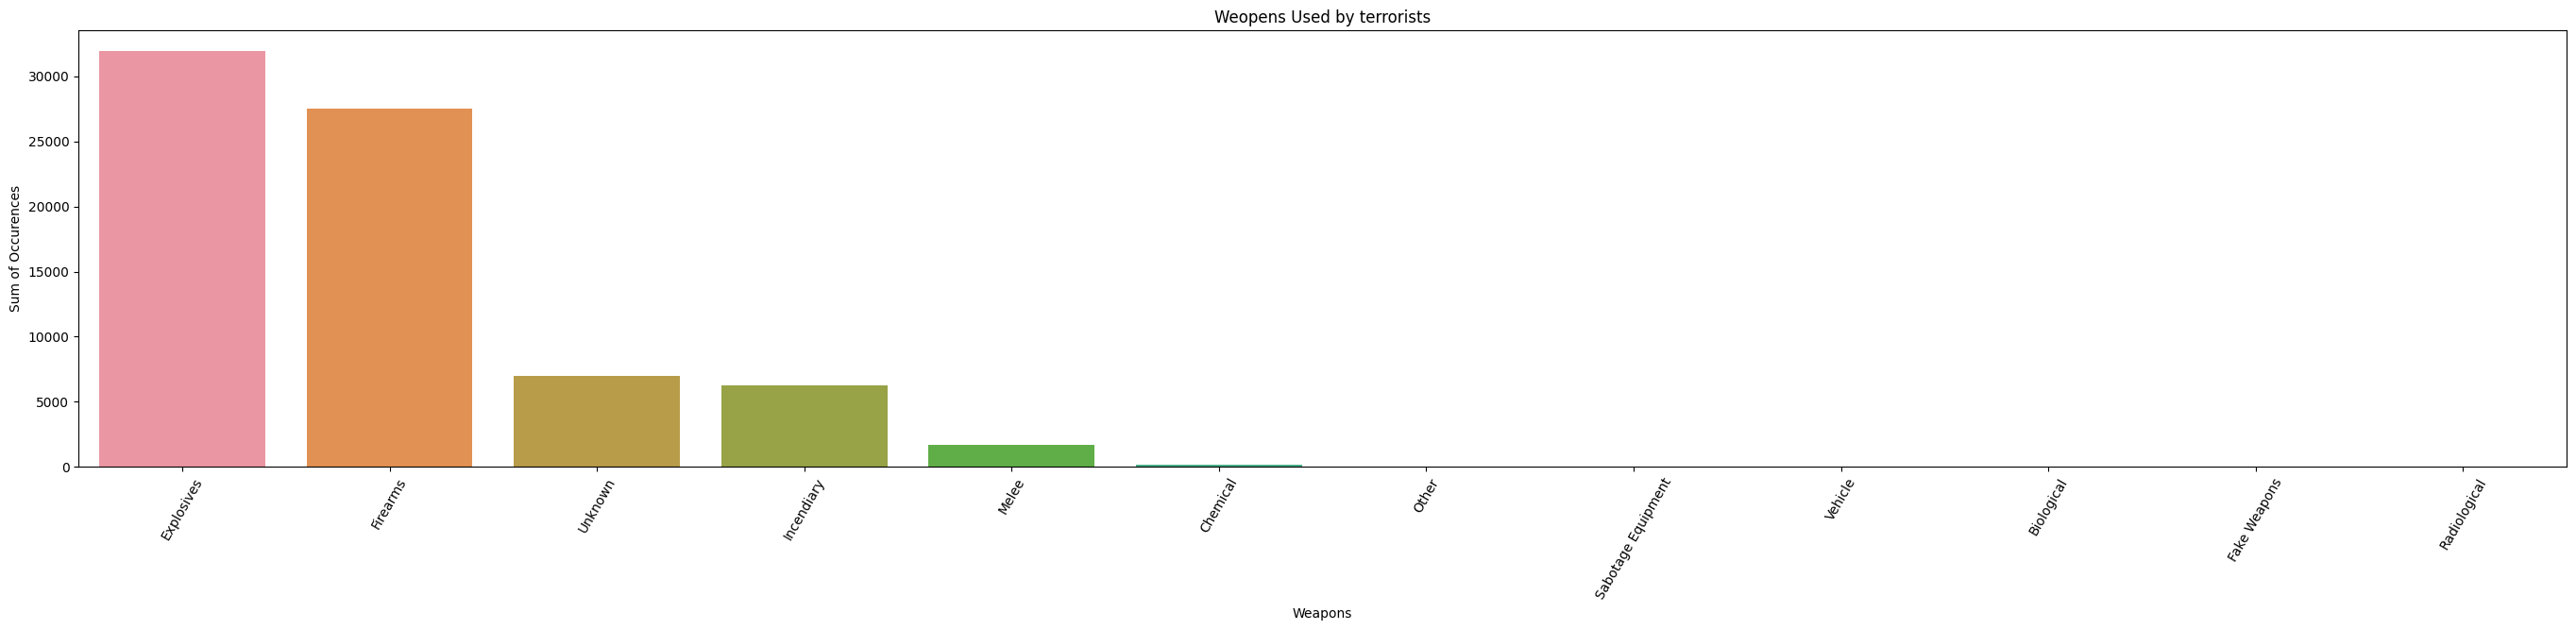

In [ ]:
plt.figure(figsize=(34,6))
df['Weapon_type'] = df['Weapon_type'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
sns.countplot(x='Weapon_type',data=df,order=df['Weapon_type'].value_counts().index)
plt.xlabel('Weapons')
plt.ylabel('Sum of Occurences')
plt.title('Weopens Used by terrorists')
plt.xticks(rotation=60)
plt.show()

#4. Motive behind activities related to terrorism

In [ ]:
df1 = df[df['Motive'].notna()]

In [ ]:
df1

Year  Month  Day        Country                      Region  \
5       1970      1    1  United States               North America   
8       1970      1    2  United States               North America   
9       1970      1    3  United States               North America   
11      1970      1    6  United States               North America   
14      1970      1    9  United States               North America   
...      ...    ...  ...            ...                         ...   
115264  2013      3   19         Turkey  Middle East & North Africa   
115290  2013      3   19    Philippines              Southeast Asia   
115298  2013      3   18    Philippines              Southeast Asia   
115303  2013      3   19          India                  South Asia   
115315  2013      3   20          Syria  Middle East & North Africa   

               city   latitude   longitude                      AttackType  \
5             Cairo  37.005105  -89.176269                   Armed Assault   
8           Madison  43.076592  -89.412488  Facility/Infrastructure Attack   
9           Madison  43.072950  -89.386694  Facility/Infrastructure Attack   
11           Denver  39.758968 -104.876305  Facility/Infrastructure Attack   
14      Rio Piedras  18.386932  -66.061127  Facility/Infrastructure Attack   
...             ...        ...         ...                             ...   
115264       Ankara  39.930771   32.767540               Bombing/Explosion   
115290        Mawab   7.500000  125.933333                   Armed Assault   
115298     Nabangig  12.102778  123.941389                   Armed Assault   
115303       Sopore  34.288891   74.463715                   Armed Assault   
115315     Damascus  33.515244   36.292084               Bombing/Explosion   

        Killed  Wounded                                             Target  \
5          0.0      0.0                          Cairo Police Headquarters   
8          0.0      0.0  R.O.T.C. offices at University of Wisconsin, M...   
9          0.0      0.0  Selective Service Headquarters in Madison Wisc...   
11         0.0      0.0           Army Recruiting Station, Denver Colorado   
14         0.0      0.0                                      Baker's Store   
...        ...      ...                                                ...   
115264     0.0      1.0                                        Parking Lot   
115290     0.0      0.0                                             Convoy   
115298     1.0      0.0                              Councilor: Ervin Niez   
115303     1.0      0.0                           Youth: Suhail Ahmed Sofi   
115315     0.0      3.0                                               Base   

                                                  Summary  \
5       1/1/1970: Unknown African American assailants ...   
8       1/2/1970: Karl Armstrong, a member of the New ...   
9       1/3/1970: Karl Armstrong, a member of the New ...   
11      1/6/1970: Unknown perpetrators threw a Molotov...   
14      1/9/1970:  The Armed Commandos of Liberation c...   
...                                                   ...   
115264  03/19/2013: Two hand grenades detonated in the...   
115290  03/19/2013: Assailants opened fire on a police...   
115298  03/18/2013: Assailants opened fire on Ervin Ni...   
115303  03/19/2013: Assailants opened fire on a civili...   
115315  03/20/2013: A fuel truck rigged with explosive...   

                                           Group                  Target_type  \
5                             Black Nationalists                       Police   
8                                New Year's Gang                     Military   
9                                New Year's Gang         Government (General)   
11                           Left-Wing Militants                     Military   
14                 Armed Commandos of Liberation                     Business   
...                                          ...              

#5. Number of terrorist activities occured in region with respect to year

In [ ]:
fig_bar = px.histogram(df, x="Region", y="Killed",
                 animation_frame="Year",
                 color_discrete_sequence=px.colors.qualitative.T10)
fig_bar.update_yaxes(showgrid=False),
fig_bar.update_xaxes(categoryorder='total descending')
fig_bar.update_traces(hovertemplate=None)
fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=45,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3045',
                        title_font=dict(size=25, color='#a6a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                        legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
                          )
fig_bar.show()

## 6. Number of Terrorist activities vs Year

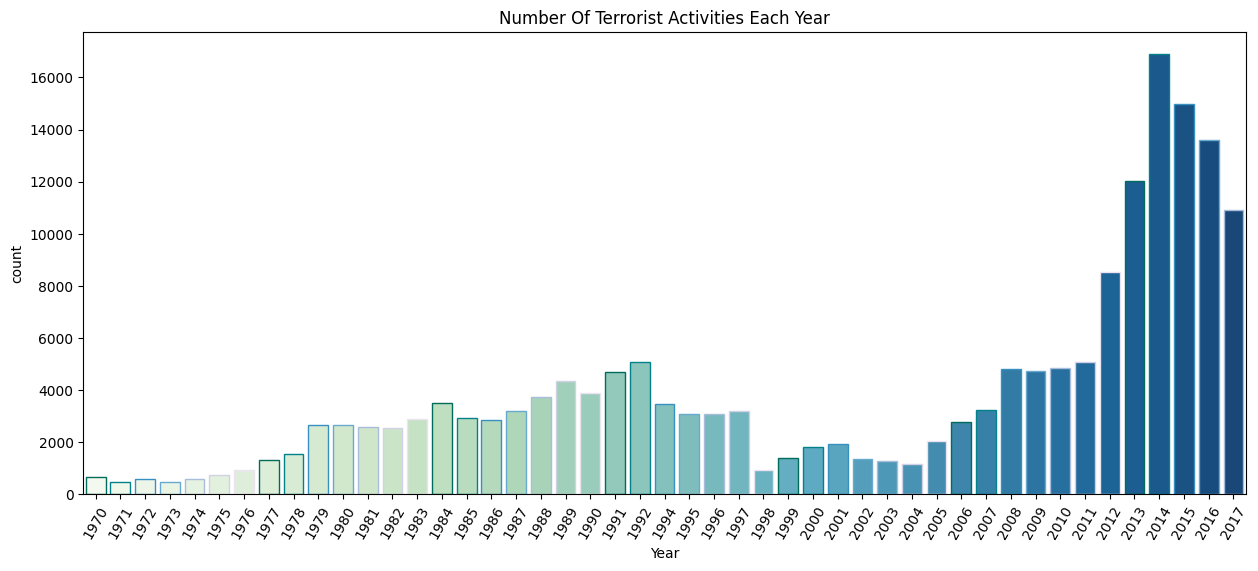

In [ ]:
# Assuming 'df' is your DataFrame with a 'Year' column
plt.subplots(figsize=(15, 6))
sns.countplot(x='Year', data=df, palette='GnBu', edgecolor=sns.color_palette('PuBuGn_r', 7))
plt.xticks(rotation=60)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()


In [ ]:
df['Killed'].sum()

248509.0

In [ ]:
colors = ['lightslategray',] * 22
colors[0] = 'cyan'
x=df['Target_type'].value_counts().index
y=df['Target_type'].value_counts()
fig = go.Figure(data=[go.Bar(
    x=x.tolist(),
    y=y.tolist(),
    marker_color=colors  # marker color can be a single color value or an iterable
)])
fig.update_layout(title_text='Main Targets', xaxis_title="Targets",
    yaxis_title="Sum of occurences",)

## 7. Who are the main targets?


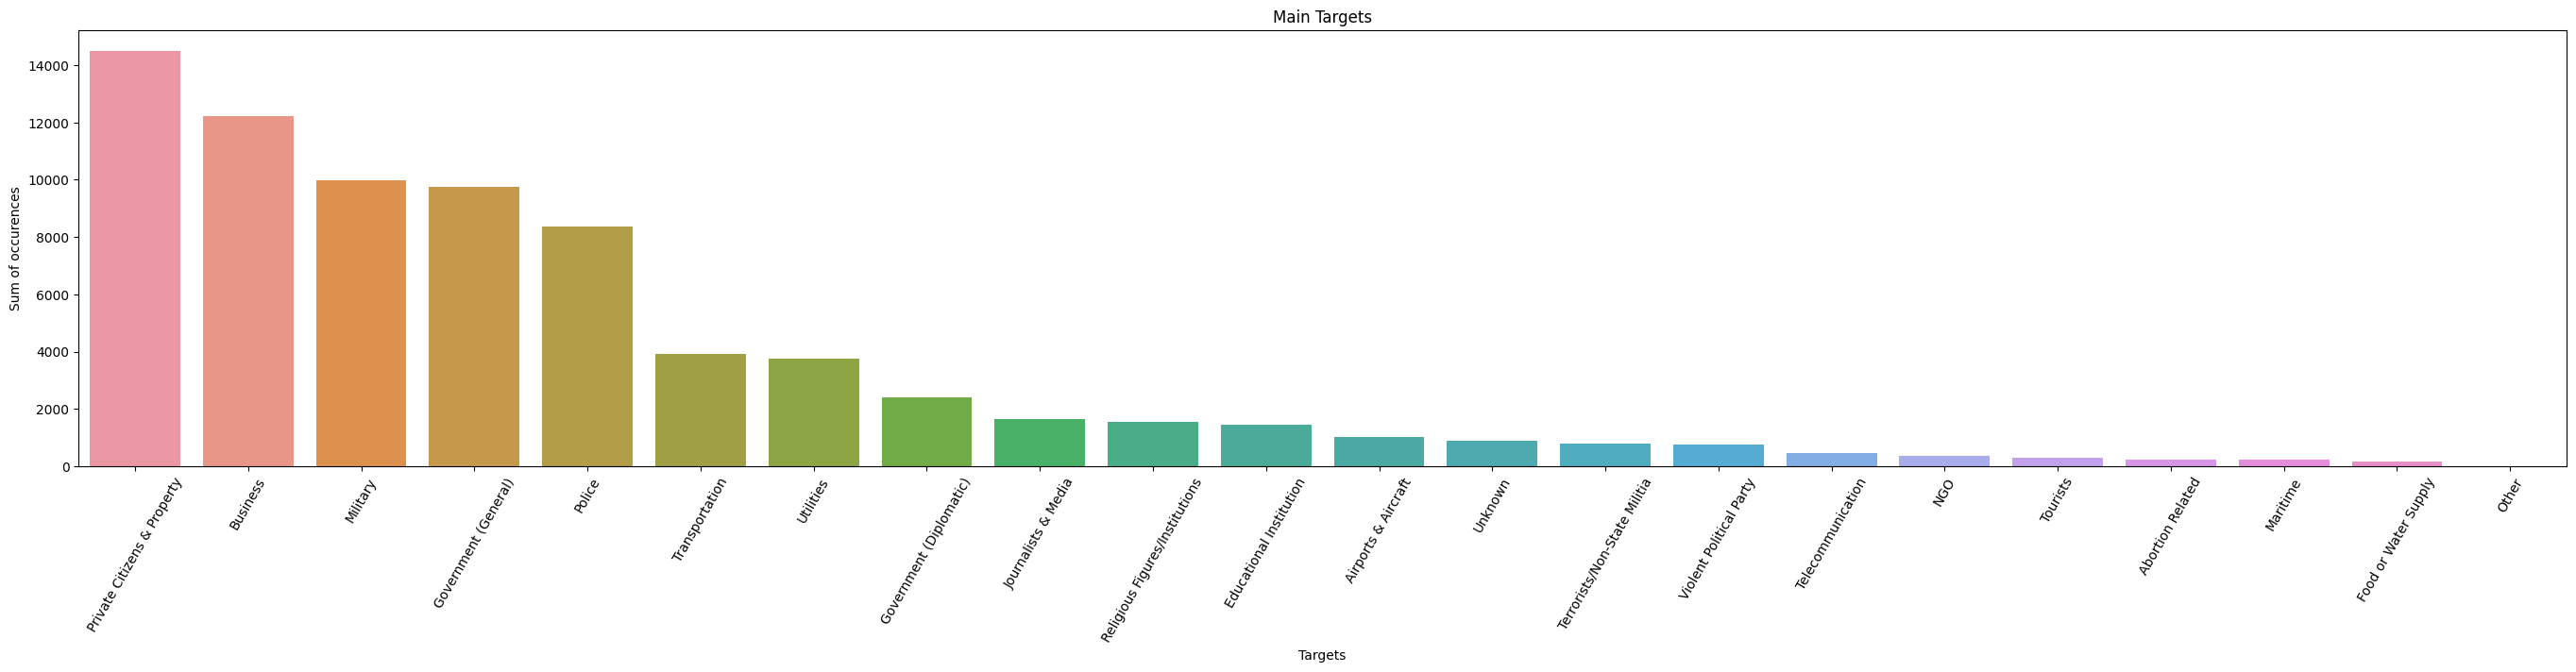

In [ ]:
plt.figure(figsize=(34,6))
sns.countplot(x='Target_type',data=df,order=df['Target_type'].value_counts().index )
plt.xlabel('Targets')
plt.ylabel('Sum of occurences')
plt.title('Main Targets')

plt.xticks(rotation = 60)
plt.show()

## 8. Hot zones of terrorism (by Country)

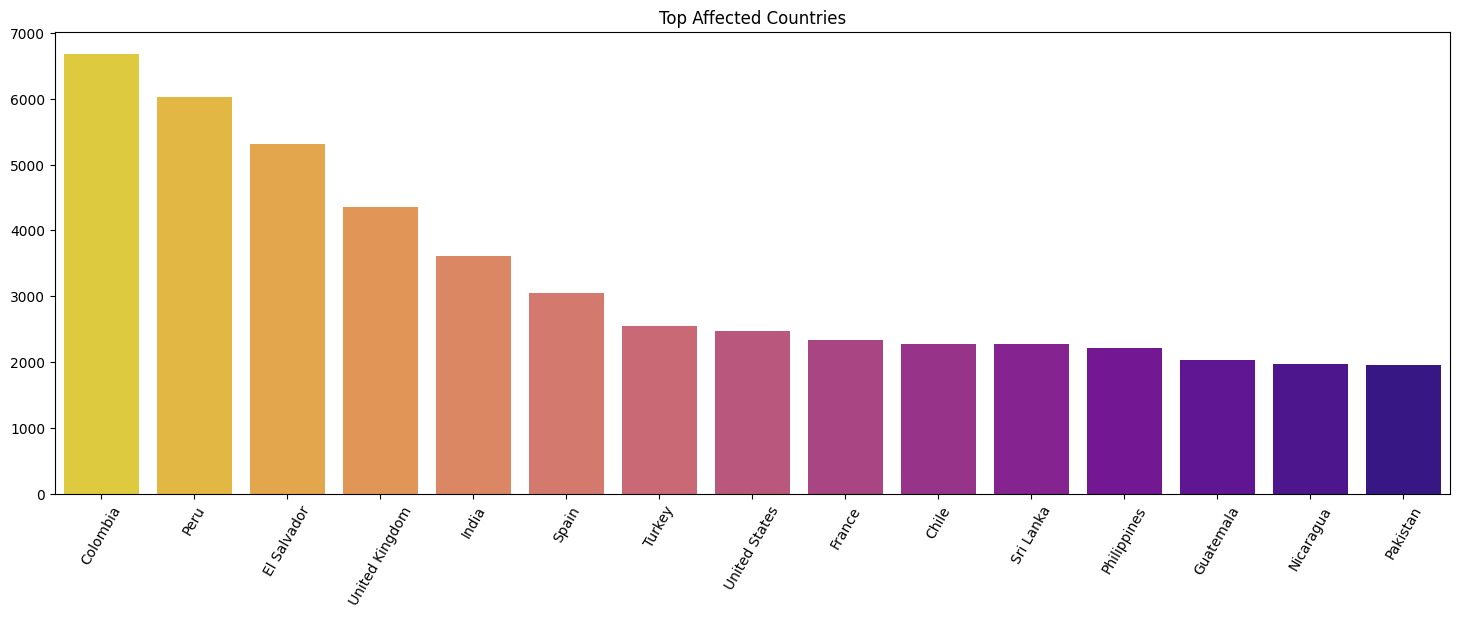

In [ ]:


# Assuming 'df' is your DataFrame
plt.subplots(figsize=(18, 6))
sns.barplot(x=df['Country'].value_counts()[:15].index, y=df['Country'].value_counts()[:15].values, palette='plasma_r')
plt.title('Top Affected Countries')
plt.xticks(rotation=60)  # Rotate x-axis labels for better readability if needed
plt.show()

## 9. Hot zones of terrorism (by City)

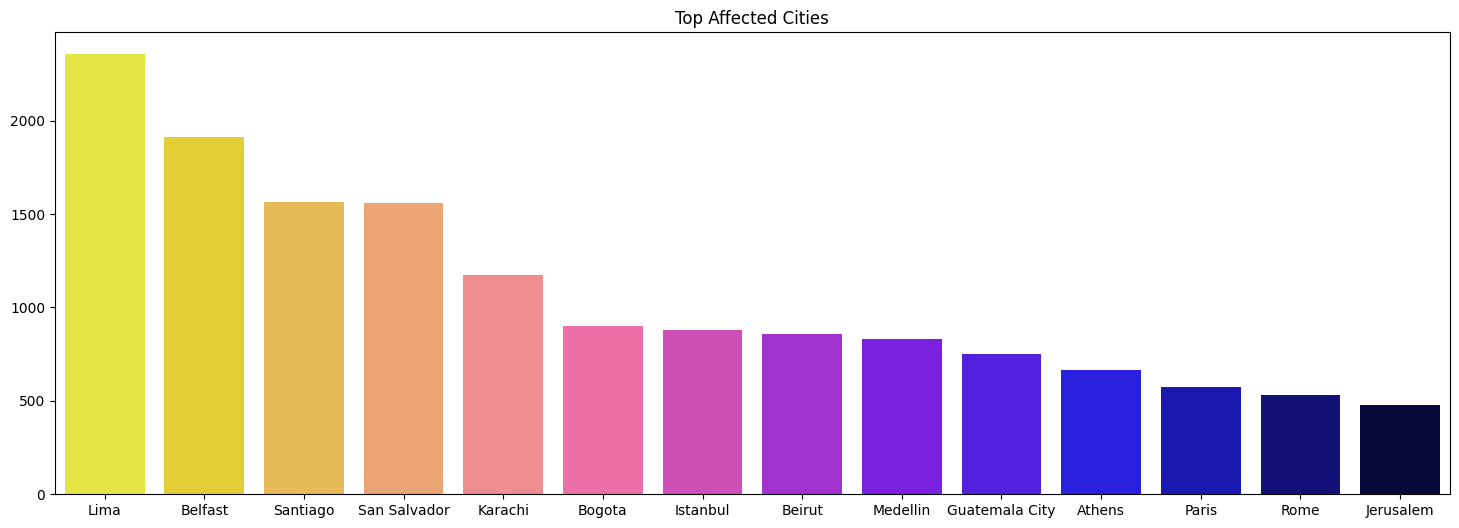

In [ ]:
plt.subplots(figsize=(18,6))
sns.barplot(x = df['city'].value_counts()[1:15].index,y = df['city'].value_counts()[1:15].values,palette='gnuplot2_r')
plt.title('Top Affected Cities')
plt.show()

## 10. What are the attacking methods used?

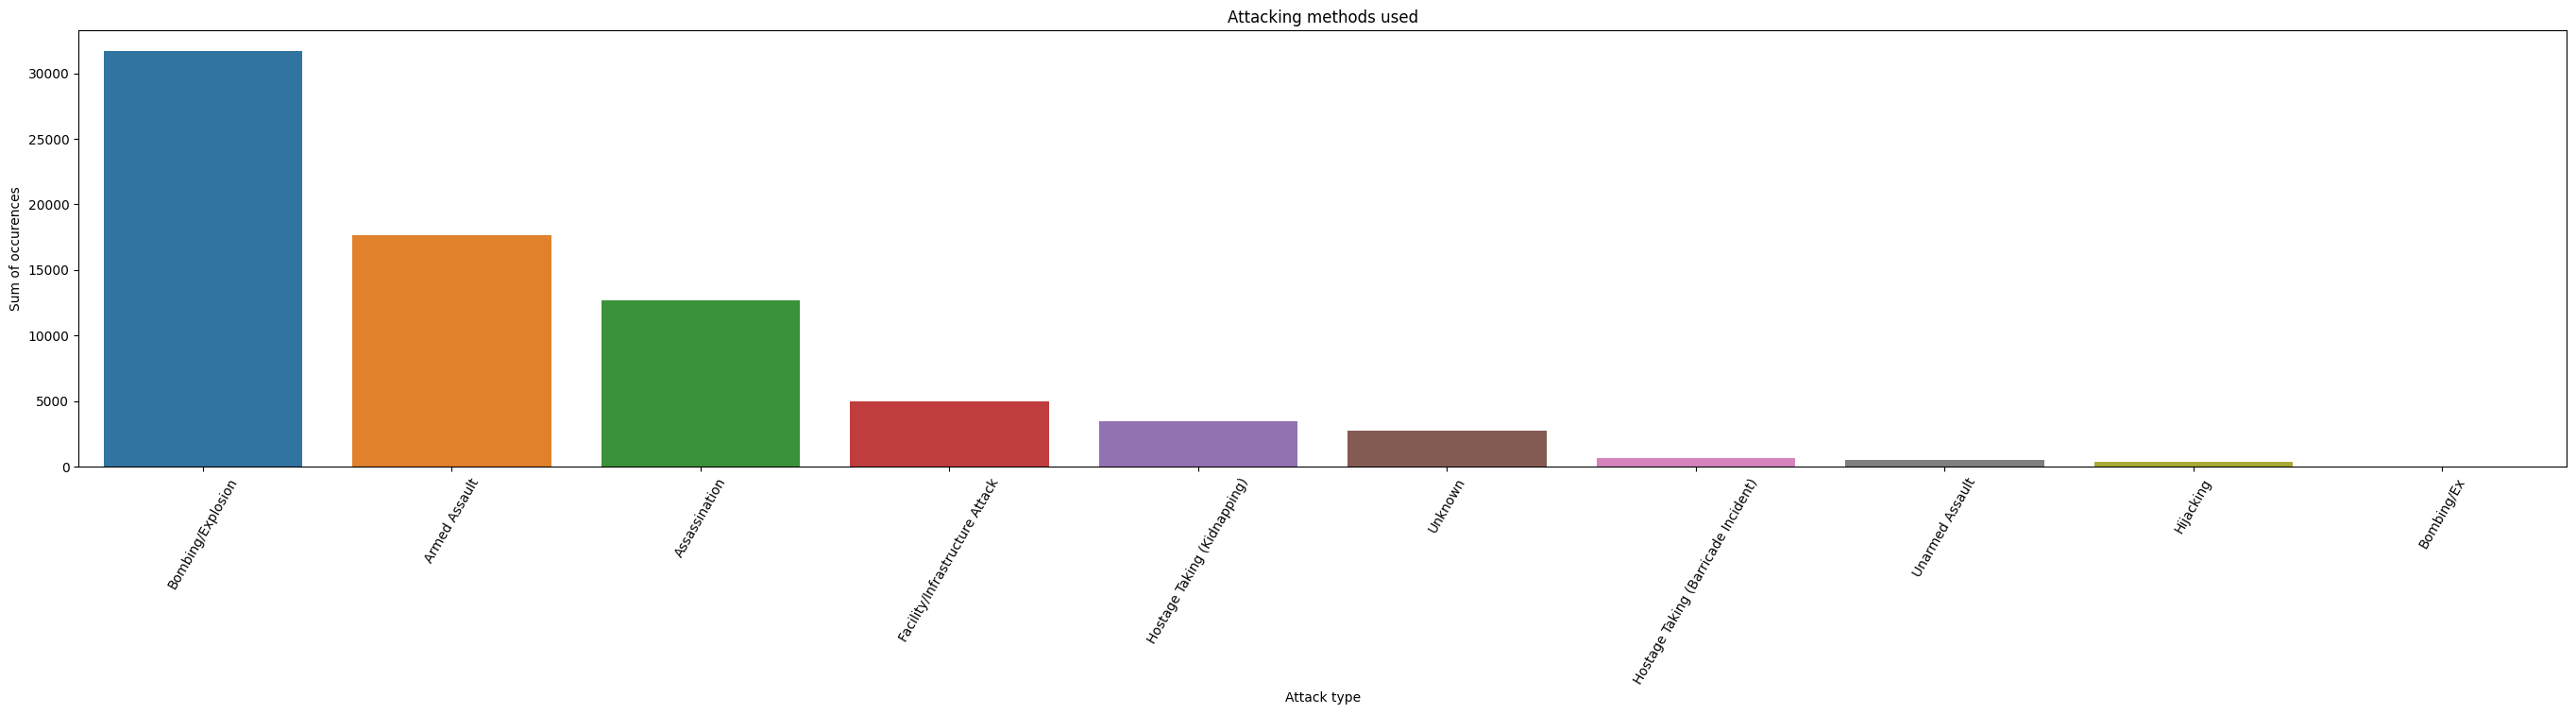

In [ ]:
plt.figure(figsize=(34,6))
sns.countplot(x='AttackType',data=df,order=df['AttackType'].value_counts().index )
plt.xlabel('Attack type')
plt.ylabel('Sum of occurences')
plt.title('Attacking methods used')

plt.xticks(rotation = 60)
plt.show()

## 11. Attack vs Killed

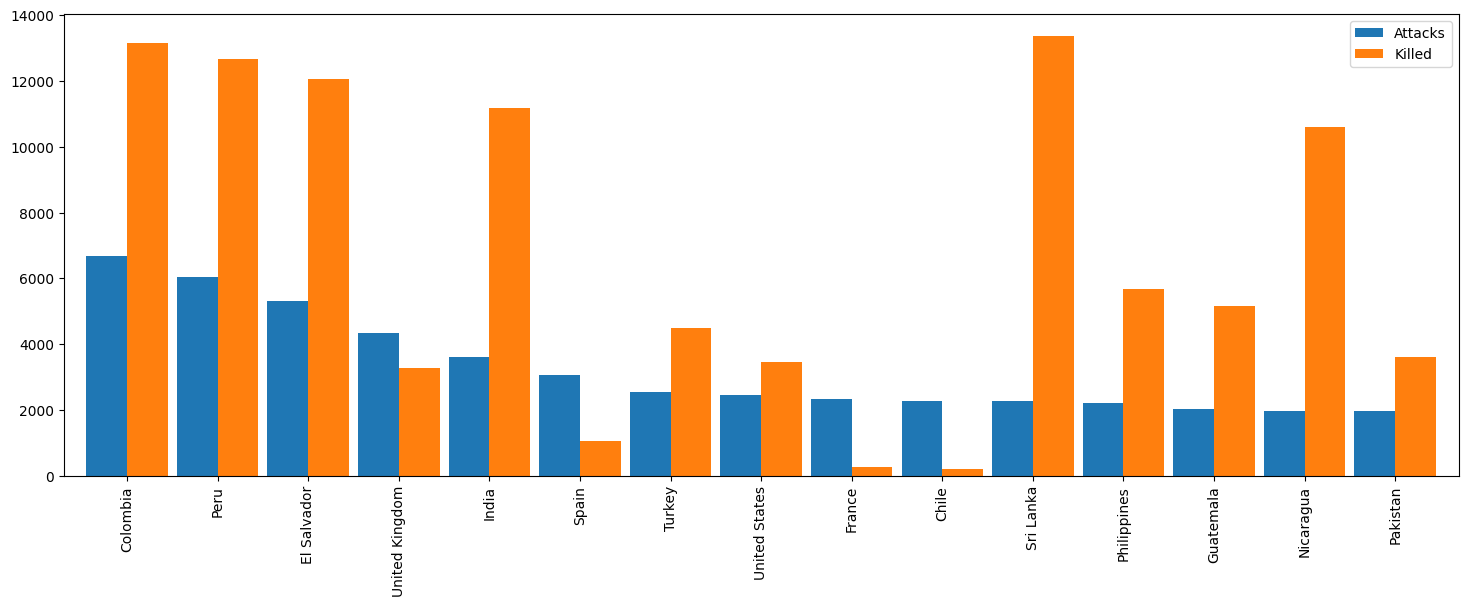

In [ ]:
coun_terror=df['Country'].value_counts()[:15].to_frame()
coun_terror.columns=['Attacks']
coun_kill=df.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## 12. Most Notorious Groups

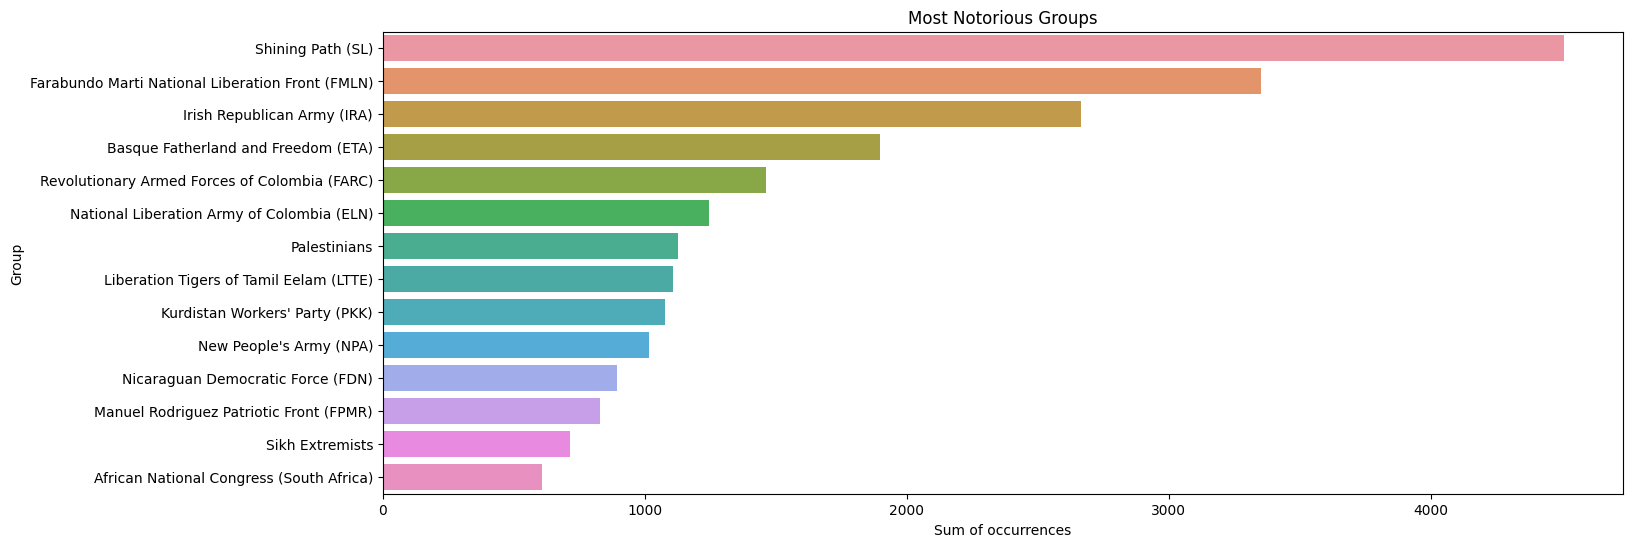

In [ ]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df['Group'].value_counts()[1:15].values, y=df['Group'].value_counts()[1:15].index, orient='horizontal')
plt.xlabel('Sum of occurrences')
plt.ylabel('Group')
plt.title('Most Notorious Groups')
plt.show()

## 13. Activity of Top Terrorist Groups

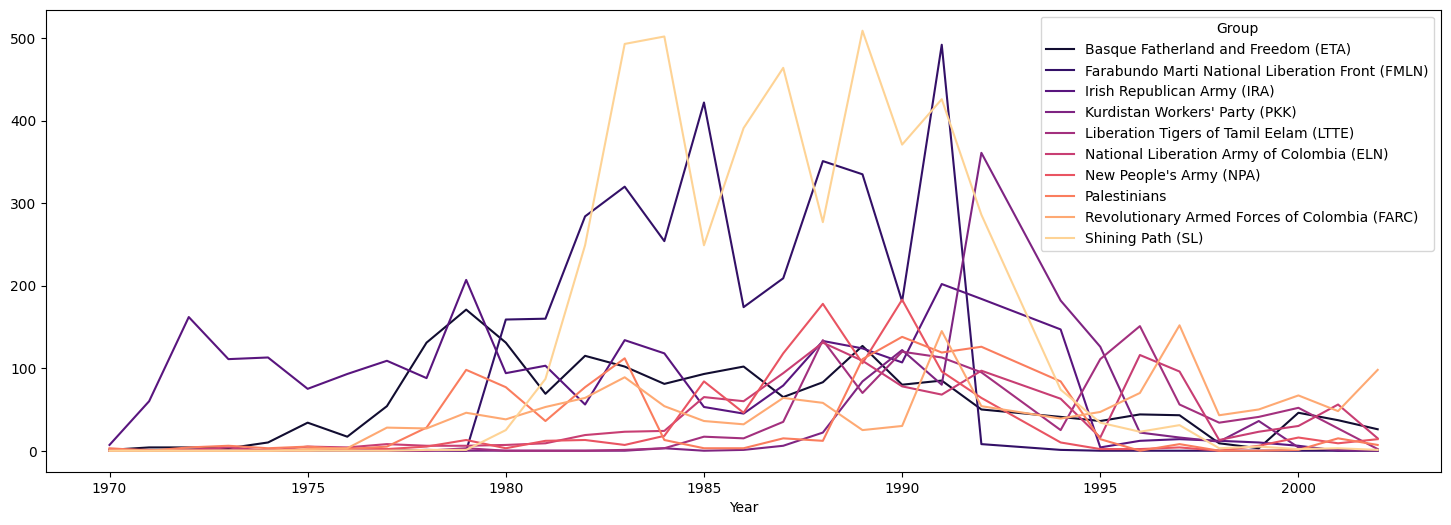

In [ ]:
top_groups10=df[df['Group'].isin(df['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('magma',10))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

# Conclusion

In summary, we've explored different forms of analysis and engaged in question-and-answer sessions with a dataset that piqued my interest. I'd like to highlight something valuable I've discovered. When we merely glance at a dataset, all we can discern is the column information and its contents. Therefore, Exploratory Data Analysis (EDA) proves to be an incredibly effective method to simplify our tasks. Thanks to Python libraries such as pandas, numpy, matplotlib, seaborn, and plotly, we're equipped to draw conclusions, perform calculations, and create visualizations, greatly enhancing our analytical capabilities.

Based on the preceding analysis, we can draw the following conclusions:
* Iraq ranks highest in the number of attacks, recording 24,636 incidents.
* The Middle and East Africa region experiences the highest number of attacks, totaling 50,474.
* The predominant weapon employed by terrorists is explosives, with a count of 92,426.
* Within the analysis, it is evident that in 2014, Iraq witnessed the highest level of terrorist activities, with 16,806 incidents.
* Private citizens and property emerge as the primary targets of terrorist activities, accounting for 43,510 incidents.
* The most prevalent methods in terrorism activities involve bombing and explosions, totaling 82,255 incidents.
* The Taliban stands out as the most notorious group, having been involved in the highest number of terrorist activities, amounting to 7,478 incidents.

***Robust security measures should be provided to countries such as Iraq, Pakistan, Afghanistan, and India, as well as to regions in the Middle East and cities like Baghdad, Karachi, Lima, and numerous others.***

***Precautions must be taken concerning explosive devices, as bombings and explosions are the most frequently utilized weapons by terrorists.***

***Effective security should be extended to safeguard private citizens, property, the military, police, and other entities, as they represent the primary targets of terrorism.***